# K-Means Clustering on MNIST Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [9]:
digits = load_digits()

In [10]:
pipe = Pipeline([
    ("Preprocessing", MinMaxScaler()),
    ("Clustering", KMeans(n_clusters=10, init="random", n_init=50, max_iter=500, random_state=0))
])

pipe.fit(digits.data)

Pipeline(steps=[('Preprocessing', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

**NOTE :**

We can also use kwargs to pass in the arguments :

```python
kmeans_kwargs = {
    "init" : "random",
    "n_init" : 50,
    "max_iter" : 500,
    "random_state" : 0
}

```

and then :

```python
KMeans(n_clusters=10, **kmean_kwargs)

```


In [11]:
cluster_centers = pipe[-1].cluster_centers_

**Displaying the Centroids**

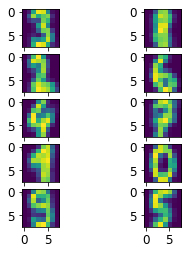

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(4,4))
for i, j in zip(ax.flat, cluster_centers.reshape(10,8,8)) :
    i.imshow(j)

Here, we knew the number of clusters already ( 10 ), so we set `k=10`. For deciding the optimal number of clusters, we will use the elbow and silhouette method. So now, we pretend that we do not know the number of clusters in the data and we will try to discover the optimal number of clusters using the mentioned methods

## Elbow Method
- Here, we keep track of sum-of-squared error (SSE) in a list for each value of `k`.
- **The SSE for a given clustering output is obtained through `inertia_` member variable.**

In [19]:
# Identifying the correct numebr of clusters

kmeans_kwargs = {
    "init" : "random",
    "n_init" : 50,
    "max_iter" : 500,
    "random_state" : 0
}

sse_digits = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)

for k in range(1, 12) :
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    sse_digits.append(kmeans.inertia_)

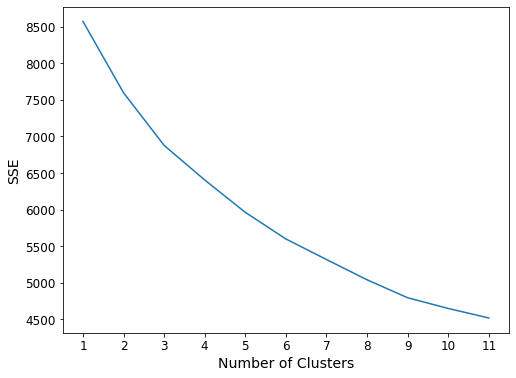

In [20]:
plt.plot(range(1, 12), sse_digits)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

There is a slight elbow at `k=9` which could point to the fact that a few digits may have been merged in one cluster.

## Silhouette Method

In [21]:
sil_coef_digits = []

for k in range(2, 15) :
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append(score)

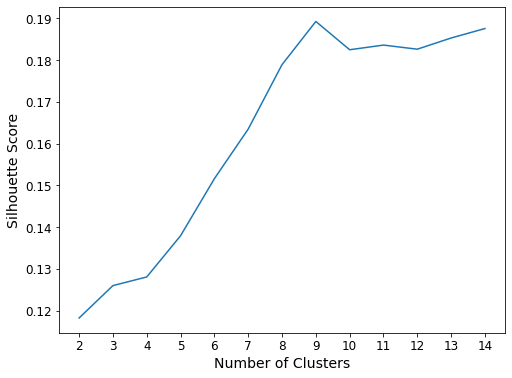

In [22]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

From the graph, it is clear that **at `n=9`, the silhouette score is maximum.** This is because some of the digits like 1 and 7 may have striking similarity. 

In [23]:
print(np.argmax(sil_coef_digits) + 2)

9


## Appendix

### `axes.flat`
It is **not a function**, it's an **attribute of the numpy.ndarray.** For example :

In [13]:
import numpy as np

a = np.array([[2,3],
              [4,5],
              [6,7]])

for i in a.flat:
    print(i)

2
3
4
5
6
7
